In [1]:
import matplotlib
matplotlib.use('agg')
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

In [2]:
openpv=pd.read_csv('./Datasets/openpv.csv',index_col=False)
openpv=openpv.rename(columns={'Size (kW DC)':'Size_kw'})
openpv['Zipcode']=openpv['Zipcode'].apply(str)
openpv['Zipcode_clean']=[('0'+zip1) if len(zip1)==6 else zip1 for zip1 in openpv['Zipcode']]
openpv.drop('Zipcode', axis=1, inplace=True)
openpv=openpv.rename(columns={'Zipcode_clean':'Zipcode'})
openpv['Zipcode']=[zip1[:5] for zip1 in openpv['Zipcode']]
openpv.loc[519,'State']='IN'
openpv['Date_inst']=[ datetime.strptime(i, '%m/%d/%Y') for i in openpv['Date Installed']]
openpv.drop('Date Installed',axis=1, inplace=True)
openpv.drop('Filters=', axis=1, inplace=True)
openpv.head()

,State,Size_kw,Cost,Zipcode,Date_inst
0,AZ,9.000,46061.19352,85048,2014-03-10
1,AZ,3.000,15562.94976,85268,2013-08-26
2,AZ,9.180,40172.24862,85234,2014-09-12
3,AZ,7.425,51128.75533,85024,2011-03-02
4,AZ,7.920,40506.65221,85201,2013-01-11


In [3]:
print 'numer or lines', len(openpv)
print 'unique zipcodes', len(openpv['Zipcode'].unique())
print 'num states', len(openpv['State'].unique())
print 'total size', sum(openpv['Size_kw'])
print 'total cost', sum(openpv['Cost'])

numer or lines 138030
unique zipcodes 9284
num states 52
total size 15604315.0923
total cost nan


In [24]:
TimeSeries=openpv.groupby(['Date_inst'])['Size_kw'].sum()
TimeSeries.drop(TimeSeries.argmax(),axis=0,inplace=True) #Clear outlier that dwarfs the rest of the graph
TimeSeries=TimeSeries[TimeSeries.index.year>=2007] #the bulk of the available data
TimeSeries=TimeSeries[TimeSeries.index.year<2015]
TimeSeriesM=TimeSeries.groupby(pd.TimeGrouper("M")).sum()
TimeSeriesA=TimeSeries.groupby(pd.TimeGrouper("A")).sum()

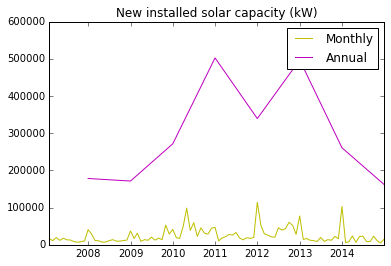

In [49]:
fig=plt.figure()
plt.title('New installed solar capacity (kW)')
plt.plot(TimeSeriesM.index, TimeSeriesM.values, 'y-', label='Monthly')
plt.plot(TimeSeriesA.index, TimeSeriesA.values,'m-', label='Annual')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,600000))
plt.legend()
fig.savefig('New_solar_capacity.png')

/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


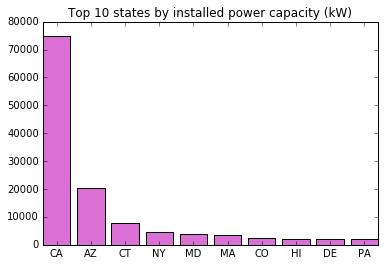

In [54]:
states= openpv.groupby(['State'])
states_stats=states.size()
states_stats.sort(ascending=False) #sorts inplace automatically
states_stats[:10]

fig=plt.figure()
states_top = states_stats.index[:10]
frequencies = states_stats.values[:10]
pos = np.arange(len(states_top))
width = .8     # gives histogram aspect to the bar diagram
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(states_top)
plt.title('Top 10 states by installed power capacity (kW)')
plt.bar(pos, frequencies, width, color='orchid')
plt.show()
fig.savefig('Top 10 states.png')

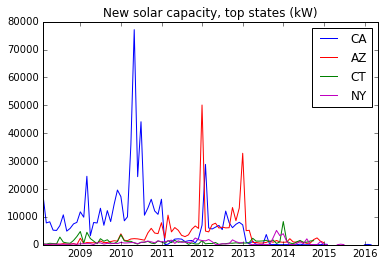

In [53]:
fig=plt.figure()
CA=states.get_group('CA')
CA_timeseries=CA.groupby(['Date_inst'])['Size_kw'].sum()
CA_timeseries=CA_timeseries[CA_timeseries.index.year>2007] #the bulk of the available data
CA_timeseries=CA_timeseries.groupby(pd.TimeGrouper("M")).sum()

AZ=states.get_group('AZ')
AZ_timeseries=AZ.groupby(['Date_inst'])['Size_kw'].sum()
AZ_timeseries=AZ_timeseries[AZ_timeseries.index.year>2007] #the bulk of the available data
AZ_timeseries=AZ_timeseries.groupby(pd.TimeGrouper("M")).sum()

CT=states.get_group('CT')
CT_timeseries=CT.groupby(['Date_inst'])['Size_kw'].sum()
CT_timeseries=CT_timeseries[CT_timeseries.index.year>2007] #the bulk of the available data
CT_timeseries=CT_timeseries.groupby(pd.TimeGrouper("M")).sum()

NY=states.get_group('NY')
NY_timeseries=NY.groupby(['Date_inst'])['Size_kw'].sum()
NY_timeseries=NY_timeseries[NY_timeseries.index.year>2007] #the bulk of the available data
NY_timeseries=NY_timeseries.groupby(pd.TimeGrouper("M")).sum()


plt.title('New solar capacity, top states (kW)')
plt.plot(CA_timeseries.index, CA_timeseries.values, label='CA')
plt.plot(AZ_timeseries.index, AZ_timeseries.values, 'r-', label='AZ')
plt.plot(CT_timeseries.index, CT_timeseries.values, 'g-', label='CT')
plt.plot(NY_timeseries.index, NY_timeseries.values, 'm-', label='NY')

plt.legend()
fig.savefig('New_solar_by_state.png')

In [46]:
#Creating dataset for the CartDB visualization - cumulative solar over time
open2000=openpv[openpv['Date_inst']>='2000']
zips=open2000.groupby(['Zipcode', pd.TimeGrouper(key='Date_inst', freq='M')])['Size_kw'].sum()
zips =zips.cumsum()
zips.to_csv('./Datasets/Installed_Solar_byZip002.csv', sep=',')
print zips.index[0]

('01001', Timestamp('2010-05-31 00:00:00'))


In [31]:
#zips=zips.to_frame()
#zips=zips.reset_index()
#zips=zips.pivot(index='Zipcode', columns='Date_inst', values='Size_kw')
#zips.to_csv('./Datasets/Installed_Solar_byZip.csv', sep=',')